# 241 Project

**Submitter: Sanchit Ram Arvind**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Question 1: Microcredit with State Changes

### 1.1

#### Question 1

$E_k$ would represent a Markov Chain for a single loan applicant, as they move across
different states of either being an applicant or a beneficiary.

#### Question 2

We can define this like a Markov Chain:

1. Beneficiary pays back a loan in $k$ => Their loan is auto-renewed => They are a
beneficiary again in $k+1$ 2. Beneficiary defaults in $k$ => Their loan is not
auto-renewed => They are an applicant in $k+1$

The above two cases only depend on $\beta$

3. Applicant applies in $k$ and receives a loan => They are now a beneficiary. 4.
Applicant applies in $k$ and is denied => They remain an applicant

(3) and (4) only depend on $\alpha$

Let's define the transition matrix $P := P_{i,j}, i,j \in {1, 2}$, which would represent
the transition matrix of the Markov Chain defined in Question 1 above.

$$ P = \begin{pmatrix} 1-\alpha & \alpha \\ 1-\beta & \beta \end{pmatrix} $$

#### Question 3

Original PDF doesn't have this

#### Question 4

Expected value: 0.51


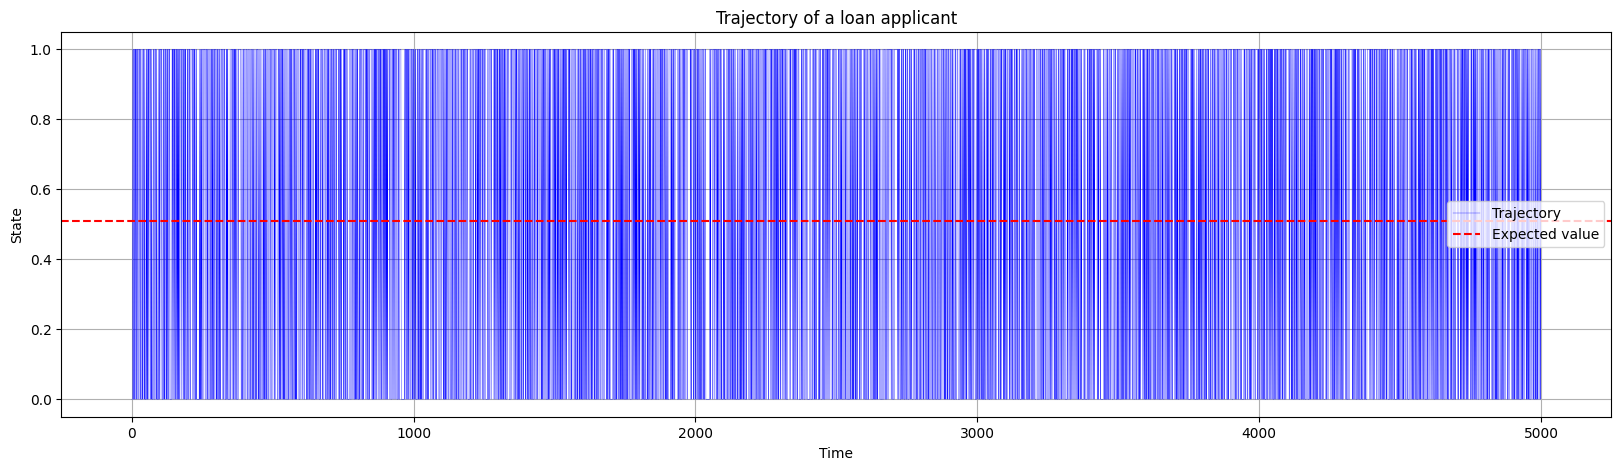

In [3]:
A = 0
B = 1
initial_probability = 0.5
k = 5000
alpha = beta = 0.5

trajectory = np.random.choice(2, size=k, p=[0.5, 0.5])

for i in range(k - 1):
    if trajectory[i] == 0:
        trajectory[i + 1] = np.random.choice(2, p=[1 - alpha, alpha])
    else:
        trajectory[i + 1] = np.random.choice(2, p=[1 - beta, beta])

# compute expected value
expected_value = np.sum(trajectory[:1001]) / 1000
print(f"Expected value: {expected_value}")

# plot the above
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(trajectory, label="Trajectory", color="blue", linewidth=0.25)
ax.set_xlabel("Time")
ax.set_ylabel("State")
ax.set_title("Trajectory of a loan applicant")
ax.legend()
ax.grid(True)

# and plot the expected value
ax.axhline(expected_value, color="red", linestyle="--", label="Expected value")
ax.legend()

plt.show()


The above result is predictable, because with $\alpha = \beta = 0.5$, the transition
matrix becomes

$$ P = \begin{pmatrix} 0.5 & 0.5 \\ 0.5 & 0.5 \end{pmatrix} $$

Since the rows are identicial, effectively all our variables, like $P(E_k = B | E_k =
A)$ is equal to all the other state changes, implying that they are IID.

#### Question 5

$\pi_k$ represents the probability distribution vector of the state of the financial
agent at time $k$

#### Question 6

In [4]:
beta = 2 / 3
alpha = 1 / 4

In [5]:
np.random.seed(242)

initial_probability = [0.5, 0.5]
k = 500
trajectory_count = 100

trajectories = []

for i in range(trajectory_count):
    trajectory = np.random.choice(2, size=k + 1, p=initial_probability)

    for t in range(k):
        if trajectory[t] == 0:  # State A
            trajectory[t + 1] = np.random.choice(2, p=[1 - alpha, alpha])
        else:  # State B
            trajectory[t + 1] = np.random.choice(2, p=[1 - beta, beta])

    trajectories.append(trajectory)

# Calculate proportion of B (1s) at the final step
prob_B = np.mean([item[-1] for item in trajectories])
prob_A = 1 - prob_B

pi_500_approx = np.array([prob_A, prob_B])
print(f"Approximated pi_500: {pi_500_approx}")


Approximated pi_500: [0.63 0.37]


The value of `pi_500` can be approximated by taking the average across all the
simulation runs. I obtained `[0.63 0.37]`. Despite the randomness in the individual
trajectories, it appears to be convering to a specific value. We can actually visualize
this, by plotting the specific trajectories, and then the average trajectory as well

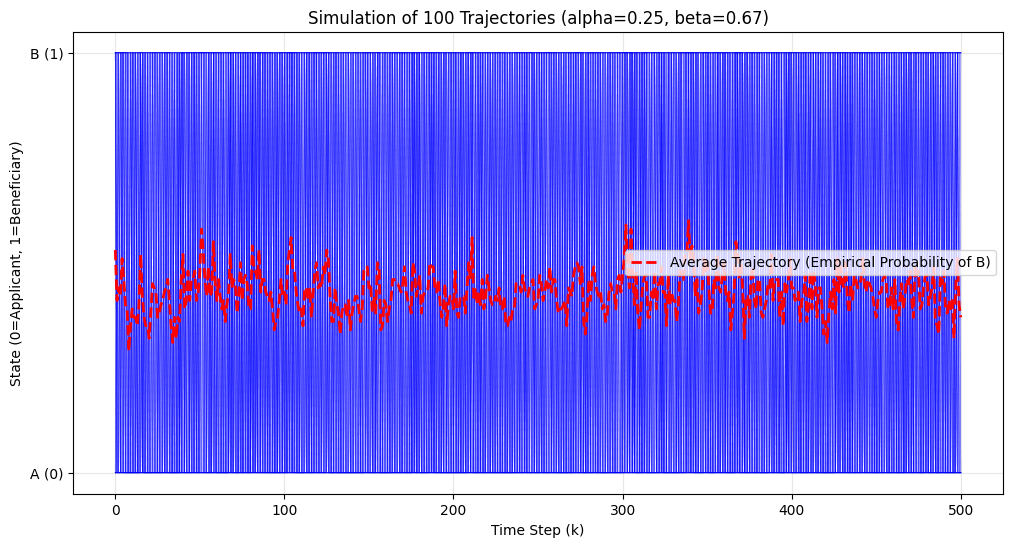

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all 100 trajectories with high transparency for better
# visibility
for traj in trajectories:
    ax.plot(traj, color="blue", alpha=0.1, linewidth=0.5)

# Plot the average trajectory to show the trend clearly
mean_trajectory = np.mean(trajectories, axis=0)
ax.plot(
    mean_trajectory,
    color="red",
    linewidth=2,
    linestyle="--",
    label="Average Trajectory (Empirical Probability of B)",
)

ax.set_title(f"Simulation of 100 Trajectories (alpha={alpha:.2f}, beta={beta:.2f})")
ax.set_xlabel("Time Step (k)")
ax.set_ylabel("State (0=Applicant, 1=Beneficiary)")
ax.set_yticks([0, 1])
ax.set_yticklabels(["A (0)", "B (1)"])
ax.legend(loc="right")
ax.grid(True, alpha=0.3)

plt.show()

#### Question 7

In [7]:
def financial_agent(
    alpha: float,
    beta: float,
    initial_probability: np.ndarray,
    trajectory_length: int,
    trajectory_count: int,
    seed: int = 242,
):
    """
    Simulation function for the financial agent problem

    Parameters:
      - alpha: float representing probability of obtaining a loan
      - beta: float representing probability of repayment
      - initial_probability: NDArray representing the probability
        of starting out either as a applicant or beneficiary
      - trajectory_length: int representing the number of runs
        within each simulation
      - trajectory_count: int representing the number of
        simulations to run
      - seed: Random seed for reproducibility

    Returns:
      - trajectories: An NDArray containing all the simulations.
        It will have trajectory_length * trajectory_count total
        elements
    """
    np.random.seed(seed)

    # guard: ensure initial probabilities sum to 1 (approx)
    assert round(sum(initial_probability), 6) == 1, (
        f"{initial_probability} doesn't sum to 1"
    )

    trajectories = []

    for _ in range(trajectory_count):
        trajectory = np.random.choice(
            2, size=trajectory_length + 1, p=initial_probability
        )

        for t in range(trajectory_length):
            if trajectory[t] == 0:  # State A
                trajectory[t + 1] = np.random.choice(2, p=[1 - alpha, alpha])
            else:  # State B
                trajectory[t + 1] = np.random.choice(2, p=[1 - beta, beta])

        trajectories.append(trajectory)

    return trajectories


trajectories = financial_agent(
    alpha=1 / 4,
    beta=2 / 3,
    initial_probability=[0.5, 0.5],
    trajectory_length=500,
    trajectory_count=100,
    seed=242,
)

try:
    financial_agent(
        alpha=1 / 4,
        beta=2 / 3,
        initial_probability=[0.65, 0.5],
        trajectory_length=500,
        trajectory_count=100,
        seed=242,
    )
except AssertionError as e:
    print(f"We successfully caught the assertion error: {e}")

We successfully caught the assertion error: [0.65, 0.5] doesn't sum to 1


Ok, with the above defined, let's run an experiment that across a range of inputted
initial probabilities, the system will eventually converge to the same values after
enough time. We'll do this by running the `financial_agent` simulation across a range of
initial probabilities, and computing the final value for each one, and then plotting the
starting probability of the starting and ending probability for b, for example.

Note that since this is a Markov Chain, we can actually calculate the theoretical
stationary distribution value, to see if it lines up with our expectation.

In [8]:
def get_theoretical_stationary_distribution(alpha: float, beta: float):
    """
    Calculates the theoretical stationary distribution
    pi = [pi_A, pi_B] for the transition matrix:
        P = | 1-alpha   alpha |
            | 1-beta    beta  |

    Formula derivation:
    pi_B = alpha / (1 - beta + alpha)
    pi_A = 1 - pi_B
    """
    pi_B = alpha / (1 - beta + alpha)
    pi_A = 1 - pi_B

    return np.array([pi_A, pi_B])


# Validation
theoretical_pi = get_theoretical_stationary_distribution(alpha=alpha, beta=beta)
print(f"Theoretical Stationary Distribution [A, B]: {theoretical_pi}")
print(f"Decimal Check for B: {theoretical_pi[1]}")


Theoretical Stationary Distribution [A, B]: [0.57142857 0.42857143]
Decimal Check for B: 0.42857142857142855


Running simulations for different initial probabilities...


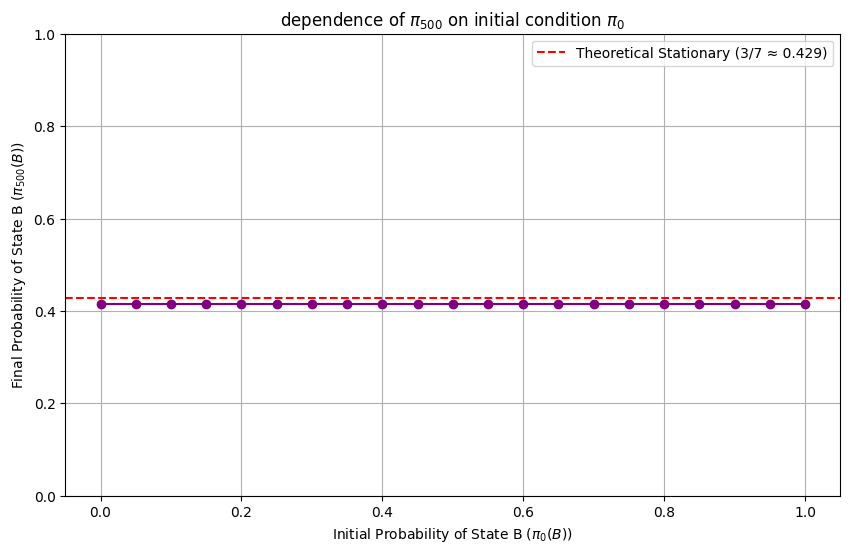

In [9]:
# Range of initial probabilities for state B (0 to 1)
start_probs_B = np.linspace(0, 1, 21)  # 0, 0.05, 0.10, ... 1
end_probs_B = []

print("Running simulations for different initial probabilities...")

for p_start in start_probs_B:
    init_prob = [1 - p_start, p_start]

    # Run your function
    trajs = financial_agent(
        alpha=alpha,
        beta=beta,
        initial_probability=init_prob,
        trajectory_length=500,
        trajectory_count=200,  # Increased slightly for smoother averages
        seed=242,
    )

    # Calculate pi_500 for State B (fraction of trajectories ending in 1)
    final_states = [t[-1] for t in trajs]
    pi_500_B = np.mean(final_states)
    end_probs_B.append(pi_500_B)

# --- Plotting the Observation ---
plt.figure(figsize=(10, 6))
plt.plot(start_probs_B, end_probs_B, marker="o", linestyle="-", color="purple")

# Theoretical stationary value calculation
theoretical_pi_B = theoretical_pi[1]
plt.axhline(
    y=theoretical_pi_B,
    color="r",
    linestyle="--",
    label=f"Theoretical Stationary (3/7 ≈ {theoretical_pi_B:.3f})",
)

plt.title(r"dependence of $\pi_{500}$ on initial condition $\pi_0$")
plt.xlabel(r"Initial Probability of State B ($\pi_0(B)$)")
plt.ylabel(r"Final Probability of State B ($\pi_{500}(B)$)")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


The graph shows that $\pi_{500}$ is approximately independent of the initial
distribution $\pi_0$. Whether you start with $100\%$ applicants or $100\%$
beneficiaries, the system converges to the same steady-state value (approx $0.43$) after
500 steps. This demonstrates the ergodicity of the Markov chain: for long times $k$, the
chain "forgets" its initial condition and converges to a unique stationary distribution.

#### Question 8

Show that $\pi_k = \pi_0 P^k$.

#### Proof by Induction

**Base Case:** By the definition of the transition matrix and the law of total
probability:$ $$ \pi_1 = \pi_0 P $$ This holds true by definition.

**Inductive Hypothesis:** Assume that for some integer $n \ge 1$, the relation holds: $$
\pi_n = \pi_0 P^n $$

**Inductive Step:** We examine the distribution at time $n+1$. By the definition of the
Markov chain evolution:$ $$ \pi_{n+1} = \pi_n P $$

Substitute the inductive hypothesis ($\pi_n = \pi_0 P^n$) into this equation: $$
\pi_{n+1} = (\pi_0 P^n) P $$

By the associativity of matrix multiplication: $$ \pi_{n+1} = \pi_0 (P^n P) = \pi_0
P^{n+1} $$

#### Conclusion

By the principle of mathematical induction, the formula $\pi_k = \pi_0 P^k$ holds for
all integers $k \ge 1$.

#### Question 9

This question is just asking us to compute the stationary distribution. Here's the
system of equation that we obtain:

Let $\pi_{*} = (x, y)$ where $x$ corresponds to state A and $y$ to state B.

The condition $\pi_{*} = \pi_{*} P$ yields the system: $$ \begin{cases} x = x(1-\alpha)
+ y(1-\beta) \\ y = x\alpha + y\beta \end{cases} $$

Additionally, we have the normalization constraint: $$ x + y = 1 \implies x = 1 - y $$

Substitute $x = 1 - y$ into the second equation of the system: $$ y = (1-y)\alpha +
y\beta $$

$$ y = \alpha - y\alpha + y\beta $$

$$ y(1 - \beta + \alpha) = \alpha $$

$$ y = \frac{\alpha}{1 - \beta + \alpha} $$

Now, find $x$: $$ x = 1 - \frac{\alpha}{1 - \beta + \alpha} = \frac{1 - \beta + \alpha -
\alpha}{1 - \beta + \alpha} = \frac{1 - \beta}{1 - \beta + \alpha} $$

Thus, the stationary distribution is: $$ \pi_{*} = \left(
\frac{1-\beta}{1-\beta+\alpha}, \quad \frac{\alpha}{1-\beta+\alpha} \right) $$

#### Question 10

This system will always converge, except in two conditions:

**1. $\beta - \alpha = 1$:**

In this case, the system of equations won't have a solution. Generally, this implies
that $\beta = 1$ and $\alpha = 0$, or the transition matrix is equal to the identity
matrix. So, if you start in A, you stay in A. If you start in B, you stay in B.

Here, there is no convergence to a universal distribution, since history is never
forgotten.

**2. $\beta - \alpha = -1$:**

This simplies that $\beta = 0$ and $\alpha = 1$. So, the system will flip between A -> B
-> A -> B -> ... forever. In this case, the stationary distribution is (0.5, 0.5), but
this system itself won't converge to it, since it will keep deterministically jumping.

For $y_k$ to converge to $y_*$ as $k \to \infty$, we require the term $(\beta -
\alpha)^k$ to vanish. This happens if and only if:

$$ |\beta - \alpha| < 1 $$

1. If $\beta - \alpha = 1$ then there is no convergence to a unique stationary
distribution independent of the initial state 2. If $\beta - \alpha = -1$ then the
system is deterministically oscillating and the convergence doesn't exist.

#### Question 11

This question is essentially asking how quick the convergence to a stationary
distributions happens – the error between the current probaility at state $k$ and the
stationary distribution gets cut down by some fixed percentage.

From the result of Question 10, we established the recurrence relation for the
probability of being in state B (denoted as index 2 or $y$):

$$ \mathbb{P}(E_k = B) - \pi_*^B = (\beta - \alpha)^k (\mathbb{P}(E_0 = B) - \pi_*^B) $$

Taking the absolute value of both sides: $$ |\mathbb{P}(E_k = B) - \pi_*^B| = |\beta -
\alpha|^k \cdot |\mathbb{P}(E_0 = B) - \pi_*^B| $$

We define the constants $\eta = |\beta - \alpha|$. From Question 10, we require that 
$|\beta - \alpha| < 1$ for convergence. **This implies that $\eta \in [0,1)$**

Now, let $C = 1$. Since probabilities are bound in $[0, 1)$, the absolute value of their
maxiumum difference must be $\le 1$. 

Therefore, $|\mathbb{P}(E_0 = B) - \pi_*^B| \le 1$.

Substituting these into the equation: $$ |\mathbb{P}(E_k = B) - \pi_*^B| \le 1 \cdot
\eta^k = C \eta^k $$

For state A (index 1), recall that $\mathbb{P}(E_k = A) = 1 - \mathbb{P}(E_k = B)$ and
$\pi_*^A = 1 - \pi_*^B$.

$$ |\mathbb{P}(E_k = A) - \pi_*^A| = |(1 - \mathbb{P}(E_k = B)) - (1 - \pi_*^B)| =
|-\mathbb{P}(E_k = B) + \pi_*^B| $$

$$ = |\mathbb{P}(E_k = B) - \pi_*^B| \le C \eta^k $$

**Deduction:**

We deduce that the random variable $E_k$ converges in law (distribution) to the
stationary distribution $\pi_*$ at a **geometric rate** (exponential speed). The speed
of this convergence is determined by the _spectral gap_ $1 - \eta = 1 - |\beta -
\alpha|$, where the spectral gap is just a fancy term that basically implies that the
smaller the difference between $\alpha, \beta$, the faster the simulation stabilizes.

#### Question 12

Let $p_1 = \mathbb{P}(E_1 = B)$.

Based on the law of total probability, $p_1$ is determined by the initial state $p_0$
and the transition probabilities:

$$ p_1 = \mathbb{P}(E_1 = B | E_0 = A)\mathbb{P}(E_0 = A) + \mathbb{P}(E_1 = B | E_0 =
B)\mathbb{P}(E_0 = B) $$

$$ p_1 = \alpha(1 - p_0) + \beta p_0 $$

There is an empirical proportion $\hat{p}_1 = 0.60$ over $n=500$ trials. The 95\%
confidence interval for the true proportion $p_1$ is given by the Wald interval
approximation:

$$ CI_{p_1} = \left[ \hat{p}_1 - z_{0.975}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n}}, \quad
\hat{p}_1 + z_{0.975}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n}} \right] $$

Using $z_{0.975} \approx 1.96$:

$$ SE = \sqrt{\frac{0.6(0.4)}{500}} = \sqrt{\frac{0.24}{500}} \approx 0.0219 $$

$$ CI_{p_1} = [0.6 - 1.96(0.0219), 0.6 + 1.96(0.0219)] \approx [0.557, 0.643] $$

So, to find the confidence interval for $\alpha$, we rearrange the probability equation:

$$ \alpha(1 - p_0) = p_1 - \beta p_0 \implies \alpha = \frac{p_1 - \beta p_0}{1 - p_0}
$$

Per question 10, we can assume $p_0 \ne 1$, otherwise $\alpha$ is unobservable.

We substitute the lower and upper bounds of $p_1$ into this expression to obtain the
95\% confidence interval for $\alpha$:

$$ CI_{\alpha} = \left[ \frac{0.557 - \beta p_0}{1 - p_0}, \quad \frac{0.643 - \beta
p_0}{1 - p_0} \right] $$

### 1.2 Extension with Fixed Exclusion Period

#### Changes to Model

- $\alpha$ represents the probability of repayment (was previously $\beta$) - $\beta$ is
now the probability of getting approved for a loan - If the agent defaults ($p =
1-\alpha$), then they are excluded from applying for the next $N$ years

First, let's figure out the state spaces:

- $x_1 = B$ (Beneficiary) - $x_2 = A^1$ (Applicant / 1 year left of exclusion) - $x_i =
A^{i-1}$ (Excluded with $i-1$ years remaining) - $x_{N+1} = A^N$ (Newly excluded / N
years remaining)

Note that the last two bullets are very similar - the last bullet is effectively a
special ase of the 3rd bullet, where i = N.

Now, for each state space concept, we want to define what the transition rules would be.
At a high level, beneficiary's either repay and become a beneficiary again, or default
and enter the exclusionary period. Applicants either succeed and become beneficiaries,
or enters the exclusionary period. And finally, if someone is inside the exclusionary
period, they **definitely** stay in there, except with one less year that they are
ineligible.

**Transitions from State B ($x_1$):** 1. $P_{1,1} = \alpha$: The agent repays
successfully and the loan is renewed 2. $P_{1,N+1} = 1 - \alpha$: The agent defaults and
enters the exclusion state $A^N$ 3. All other $P_{1,j} = 0$

**Transitions from State $A^1$ ($x_2$):** 1. $P_{2,1} = \beta$: The agent applies and
obtains the loan. 2. $P_{2, N+1} = 1 - \beta$: The agent is refused and enters exclusion
state $A^N$ (resetting the clock) 3. $P_{2,2} = 0$: You cannot stay in $A^1$; you either
succeed or get excluded for $N$ years.

**Transitions from States $A^i$ where $i > 1$:** ($x_3$ to $x_{N+1}$):** These states
represent the "countdown" of the exclusion period. The agent simply moves one year
closer to being eligible.

1. $P_{i, i-1} = 1$: An agent with $i-1$ years remaining ($x_i$) moves to having $i-2$
years remaining ($x_{i-1}$) with certainty. * For example, $P_{3,2} = 1$ (moving from
$A^2 \to A^1$). * $P_{N+1, N} = 1$ (moving from $A^N \to A^{N-1}$).

The matrix form of P would be:

$$ \begin{bmatrix} \alpha & 0 & 0 & ... & 0 & 1-\alpha \\ \beta & 0 & 0 & ... & 0 &
1-\beta \\ 0 & 1 & 0 & ... & 0 & 0 \\ 0 & 0 & 1 & ... & 0 & 0 \\ \vdots & \vdots &
\vdots & \ddots & \vdots & \vdots \\ 0 & 0 & 0 & ... & 1 & 0 \\ \end{bmatrix} $$

To verify that $P$ is a valid transition matrix, it must verify two properties:

1. **Non-negativity:** which we observe, since all entries are probabilities of
transitioning between the states 2. **Stochasticity:** which is that all rows must sum
to 1. We do observe this in the matrix. Row 1 is $1 - \alpha + \alpha$, which is the
same for row 2 except using $\beta$. All other rows have only one cell with a value of 1

So, $P$ is a valid stochastic transition matrix.

#### Question 14

Intuitively: there's a structure in the transition matrix, where you can only enter the
"punishment" states – that is, the ones where you cannot apply for a loan, from the
previous state.

So, from the applicant or beneficiary states, you can enter $A^N$, representing that you
are excluded for N periods. From $A^N$, you can only enter $A^{N-1}$. This is the **only
way** to enter this state. The same is true for $A^{N-2}, A^{N-3}$, ... and so on.

So, let $\pi_* = (\pi_B, \pi_{A^1}, \pi_{A^2}, \dots, \pi_{A^N})$.

From the structure of matrix $P$ derived in Question 13, the balance equations are:

1. For state $B$ (Column 1): 

$$ 
\begin{aligned} 
    & \pi_B = \pi_B \alpha + \pi_{A^1} \beta \\ 
    \implies & \pi_B (1 - \alpha) = \pi_{A^1} \beta \\ 
    \implies & \pi_B = \pi_{A^1} \frac{\beta}{1-\alpha} 
\end{aligned}
$$

2. For the exclusion states $A^k$ ($k \in \{1, \dots, N-1\}$): As stated above, and from
the structure of the lower block of the transition matrix $P$, we have a deterministic
flow $A^{k+1} \to A^k$: $$ \pi_{A^k} = \pi_{A^{k+1}} $$

By induction, all states in the exclusion/applicant chain have equal probability: $$
\pi_{A^1} = \pi_{A^2} = \dots = \pi_{A^N} = x $$

3. Normalization Constraint:

The sum of all probabilities must be 1: $$ \pi_B + \sum_{k=1}^{N} \pi_{A^k} = 1 $$

So, we can solve this in two variables:

$$ \pi_B + N x = 1 $$

Now, substitute the expression for $\pi_B$ from step 1 into the normalization equation:
$$ x \frac{\beta}{1-\alpha} + N x = 1 $$

Factor out $x$: $$ x \left( \frac{\beta}{1-\alpha} + N \right) = 1 $$ $$ x \left(
\frac{\beta + N(1-\alpha)}{1-\alpha} \right) = 1 $$ $$ x = \frac{1-\alpha}{\beta +
N(1-\alpha)} $$

Finally, solve for $\pi_B$:

$$ \pi_B = x \frac{\beta}{1-\alpha} = \left( \frac{1-\alpha}{\beta + N(1-\alpha)}
\right) \frac{\beta}{1-\alpha} = \frac{\beta}{\beta + N(1-\alpha)} $$

The stationary distribution $\pi_*$ is given by: $$ \pi_* = \left(
\underbrace{\frac{\beta}{\beta + N(1-\alpha)}}_{\text{State B}}, \quad
\underbrace{\frac{1-\alpha}{\beta + N(1-\alpha)}}_{\text{State } A^1}, \quad \dots,
\quad \underbrace{\frac{1-\alpha}{\beta + N(1-\alpha)}}_{\text{State } A^N} \right) $$

#### Question 15

Let $\pi_k = (y_k, x_k^1, x_k^2, \dots, x_k^N)$, where $y_k = \mathbb{P}(E_k = B)$ and
$x_k^j = \mathbb{P}(E_k = A^j)$.

Using the relation $\pi_{k+1} = \pi_k P$, we obtain the following system:

1. For the Beneficiary State ($B$): $$ y_{k+1} = \alpha y_k + \beta x_k^1 $$

2. For the Exclusion Entry State ($A^N$): This state receives flows from defaults and
refusals: $$ x_{k+1}^N = (1-\alpha)y_k + (1-\beta)x_k^1 $$

3. For the Intermediate Exclusion States ($A^j$ where $j < N$): These states simply
shift mass from the higher index: $$ x_{k+1}^j = x_k^{j+1} \quad \text{for } j = 1,
\dots, N-1 $$

Combining (1) and (3) allows us to see the delay effect. Since $x_k^1 = x_{k-1}^2 =
\dots = x_{k-N+1}^N$, the probability of being an active applicant at time $k$ depends
on the influx into the exclusion zone $N$ steps ago.

Since $(E_k)_{k \ge 1}$ is a Markov chain on the finite state space $\{B, A^1, \dots,
A^N\}$ with transition matrix $P$, the probability distribution at step $k+1$ is
obtained by multiplying the distribution at step $k$ by the transition matrix:

$$ \pi_{k+1} = \pi_k P $$

If we apply the relation recursively: $$ \begin{aligned} \pi_1 &= \pi_0 P \\ \pi_2 &=
\pi_1 P = (\pi_0 P) P = \pi_0 P^2 \\ &\vdots \\ \pi_k &= \pi_0 P^k \end{aligned} $$

Thus, the probability distribution at time $k$ is given by: $$ \pi_k = \pi_0 P^k $$

#### Question 16

In [10]:
def financial_agent_fixed_exclusion(
    N: int, alpha: float, beta: float, pi_0: np.ndarray, n_steps: int
):
    """
    Simulates the evolution of the distribution pi_k for the fixed
    exclusion model.

    Returns:
        pi_history_B: A list containing the probability of being in State B
                      at each time step k=0 to n_steps.
        final_distribution: The full vector pi_n_steps.
    """
    # Construct the Transition Matrix P (Size N+1)
    size = N + 1
    P = np.zeros((size, size))

    # Row 0 (State B): Renew (-> B) or Default (-> A^N)
    # A^N is at index N
    P[0, 0] = alpha
    P[0, N] = 1 - alpha

    # Row 1 (State A^1): Obtain Loan (-> B) or Refusal (-> A^N)
    P[1, 0] = beta
    P[1, N] = 1 - beta

    # Rows 2 to N (States A^2 to A^N): Deterministic countdown (A^k -> A^{k-1})
    # Logic: Row r (State A^{r-1}) goes to Column r-1 (State A^{r-2})
    for r in range(2, size):
        P[r, r - 1] = 1.0

    # Iterate to build history
    pi_current = pi_0.copy()
    pi_history_B = [pi_current[0]]  # Store prob of state B (index 0)

    for _ in range(n_steps):
        pi_current = pi_current @ P
        pi_history_B.append(pi_current[0])

    return pi_history_B, pi_current

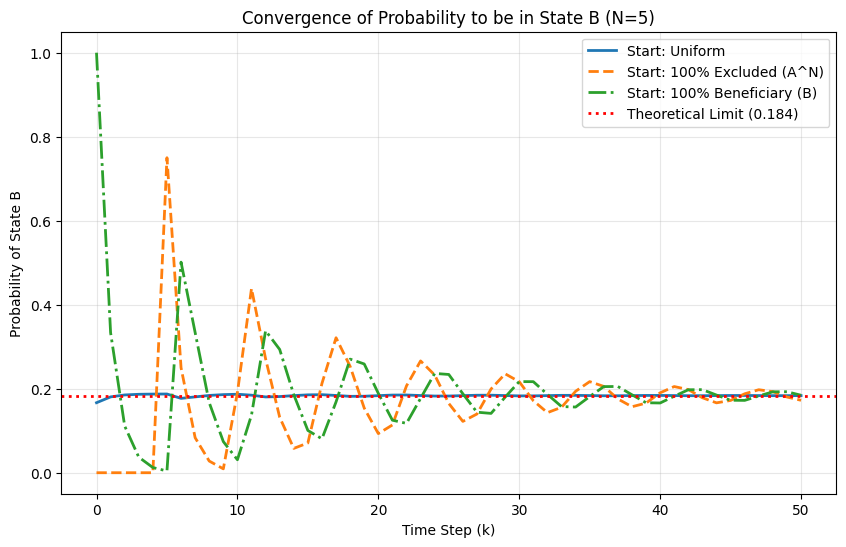

Final Uniform: 0.1837
Final Excluded: 0.1724
Theoretical: 0.1837


In [11]:
n = 5
alpha = 1 / 3
beta = 3 / 4
steps = 50

# let's run three cases: uniform, A^N, and B

# Case 1: Uniform Start (1/(N+1) everywhere)
pi_0_uniform = np.ones(n + 1) / (n + 1)

# Case 2: Worst Case Start (100% in A^N - newly excluded)
pi_0_excluded = np.zeros(n + 1)
pi_0_excluded[n] = 1.0

# Case 3: Best Case Start (100% in B - beneficiary)
pi_0_beneficiary = np.zeros(n + 1)
pi_0_beneficiary[0] = 1.0

# Run Simulations
hist_uniform, final_uniform = financial_agent_fixed_exclusion(
    N=n,
    alpha=alpha,
    beta=beta,
    pi_0=pi_0_uniform,
    n_steps=steps,
)

hist_excluded, final_excluded = financial_agent_fixed_exclusion(
    N=n,
    alpha=alpha,
    beta=beta,
    pi_0=pi_0_excluded,
    n_steps=steps,
)

hist_beneficiary, final_beneficiary = financial_agent_fixed_exclusion(
    N=n,
    alpha=alpha,
    beta=beta,
    pi_0=pi_0_beneficiary,
    n_steps=steps,
)

# Theoretical Value (for validation)
# pi_B = beta / (beta + N(1-alpha))
denom = beta + n * (1 - alpha)
theo_pi_B = beta / denom

# Plot
plt.figure(figsize=(10, 6))

plt.plot(hist_uniform, label="Start: Uniform", linestyle="-", linewidth=2)
plt.plot(hist_excluded, label="Start: 100% Excluded (A^N)", linestyle="--", linewidth=2)
plt.plot(
    hist_beneficiary, label="Start: 100% Beneficiary (B)", linestyle="-.", linewidth=2
)

plt.axhline(
    y=theo_pi_B,
    color="red",
    linestyle=":",
    linewidth=2,
    label=f"Theoretical Limit ({theo_pi_B:.3f})",
)

plt.title(f"Convergence of Probability to be in State B (N={n})")
plt.xlabel("Time Step (k)")
plt.ylabel("Probability of State B")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print numerical check
print(f"Final Uniform: {final_uniform[0]:.4f}")
print(f"Final Excluded: {final_excluded[0]:.4f}")
print(f"Theoretical: {theo_pi_B:.4f}")


Two observations:

1. Convergence to the Theoretical Limit (Referencing Q14)

You can see that the numerically computed distribution $\pi_{1000}$ matches the
theoretical stationary distribution $\pi_*$ derived in Question 14.

**Theoretical Calculation:** With $N=5, \alpha=1/3, \beta=3/4$, we calculated $\pi_*^B
\approx 0.1837$.

**Numerical Result:** The simulation yields $\pi_{1000}(B) \approx 0.1837$, confirming
our theoretical derivation of the stationary vector

2. Independence from Initial Conditions (Referencing Q15)

The final distribution is identical regardless of the starting state $\pi_0$. In my
case, I identified three starting variables: Uniform, 100% Beneficiary, or 100%
Excluded. This validates the property shown in Question 15: $\pi_k = \pi_0 P^k$. As $k
\to \infty$, the matrix $P^k$ converges to a matrix where every row is the stationary
distribution $\pi_*$. Consequently, the term $\pi_0$ "cancels out," demonstrating the
ergodicity of the Markov chain. The system eventually "forgets" its history (exclusion
or beneficiary status) and settles into the steady-state probability.

## Question 2: Ruin Theory

### 1.1 Modeling Random Chains

#### Question 1

Proceed by induction on $n$.

**Base Case ($n=1$):** For $n=1$, the proposed formula gives: $$ \gamma_{\lambda,1}(x) =
\frac{\lambda^1}{(1-1)!} x^{1-1} e^{-\lambda x} 1_{x \ge 0} = \lambda e^{-\lambda x}
1_{x \ge 0} $$ Thus, the property holds for $n=1$.

Suppose for some $n \ge 1$, the random variable $T_n$ has the density: $$ f_{T_n}(x) =
\frac{\lambda^n}{(n-1)!} x^{n-1} e^{-\lambda x} 1_{x \ge 0} $$

We need to demonstrate that this implies that the property holds for $n+1$.

Consider $T_{n+1} = T_n + \tau_{n+1}$. Since $\tau_{n+1}$ is independent of $T_n$, the
density of the sum is the convolution of the individual densities:

$$ f_{T_{n+1}}(x) = (f_{T_n} * f_{\tau})(x) = \int_{-\infty}^{+\infty} f_{T_n}(y)
f_{\tau}(x-y) \, dy $$

Since $T_n$ and $\tau$ are non-negative, the integrand is non-zero only when $y \ge 0$
and $x-y \ge 0$ (i.e., $0 \le y \le x$). For $x < 0$, the density is 0. For $x \ge 0$:
$$ f_{T_{n+1}}(x) = \int_{0}^{x} \left( \frac{\lambda^n}{(n-1)!} y^{n-1} e^{-\lambda y}
\right) \left( \lambda e^{-\lambda (x-y)} \right) \, dy $$

Combine the terms. Note that $e^{-\lambda y} e^{-\lambda (x-y)} = e^{-\lambda x}$. 

$$
f_{T_{n+1}}(x) = \frac{\lambda^{n+1}}{(n-1)!} e^{-\lambda x} \int_{0}^{x} y^{n-1} \, dy
$$

Compute the integral: $$ \int_{0}^{x} y^{n-1} \, dy = \left[ \frac{y^n}{n} \right]_0^x =
\frac{x^n}{n} $$

Substitute this back: $$ f_{T_{n+1}}(x) = \frac{\lambda^{n+1}}{(n-1)!} e^{-\lambda x}
\cdot \frac{x^n}{n} = \frac{\lambda^{n+1}}{n(n-1)!} x^n e^{-\lambda x} $$

Since $n(n-1)! = n!$, we obtain: $$ f_{T_{n+1}}(x) = \frac{\lambda^{n+1}}{n!} x^n
e^{-\lambda x} 1_{x \ge 0} $$

Therefore, $T_n$ follows a Gamma distribution with parameters $(n, \lambda)$ for all $n
\ge 1$.

#### Question 2

Given the definition $N_t = \sup\{n \in \mathbb{N} : T_n \le t\}$, we can interpret the
components as follows:

- $T_n$ represents the arrival time of the $n$-th event. - The condition $T_n \le t$
implies that the $n$-th event has occurred by time $t$. - The supremum picks the largest
integer $n$ satisfying this condition.

Therefore, $N_t$ represents **the total number of events** (or jumps) that have occurred
in the time interval $[0, t]$.

This defines $N_t$ as the **counting process** associated with the sequence of arrival
times $(T_n)_{n \ge 1}$. In lecture, we called this a Poisson Process.

#### Question 3

**1. Necessary and Sufficient Condition:** Let $A$ be the event that the process $N$
only has jumps of size

$$ A = \{ \forall i \ge 1, T_i < T_{i+1} \} = \bigcap_{i \ge 1} \{ \tau_i > 0 \} $$

Since the sequence $(\tau_i)_{i \ge 1}$ consists of i.i.d. random variables, we can
compute the probability of $A$ as the limit of the product of individual probabilities.
Let $p = \mathbb{P}(\tau_1 > 0)$.

$$ \mathbb{P}(A) = \mathbb{P}\left( \bigcap_{i \ge 1} \{ \tau_i > 0 \} \right) =
\prod_{i=1}^{\infty} \mathbb{P}(\tau_i > 0) = \lim_{n \to \infty} p^n $$

For this probability $\mathbb{P}(A)$ to be strictly positive (non-zero), it is
**necessary and sufficient** that:

$$ p = 1 \iff \mathbb{P}(\tau_1 > 0) = 1 $$

If $p < 1$, then $\lim_{n \to \infty} p^n = 0$.

**2. What does this mean?**

The inter-arrival times $\tau_i$ follow an exponential distribution with parameter
$\lambda > 0$. The exponential distribution is a continuous random variable, implying
that the probability of the variable taking any single point value is zero.

$$ \mathbb{P}(\tau_1 = 0) = \int_{0}^{0} \lambda e^{-\lambda x} \, dx = 0 $$

Consequently, $\mathbb{P}(\tau_1 > 0) = 1$.

Substituting this back into our limit expression: $$ \mathbb{P}(N \text{ only has jumps
of size } 1) = \lim_{n \to \infty} (1)^n = 1 $$

Thus, the Poisson process almost surely has only jumps of size 1 (simple jumps).

#### Question 4

The goal is to derive the PDF of $\mathbb{P}(N_t = n)$. Using the hint provided:

$$ \{N_t = n\} = \{ T_n \le t < T_{n+1} \} $$

We can rewrite the condition $T_{n+1} > t$ as $T_n + \tau_{n+1} > t$, or $\tau_{n+1} > t
- T_n$.

Since $T_n$ and $\tau_{n+1}$ are independent, we can compute this probability by
integrating over the density of $T_n$ (derived in Question 1) for all values $0 \le s
\le t$:

$$ \mathbb{P}(N_t = n) = \int_{0}^{t} f_{T_n}(s) \cdot \mathbb{P}(\tau_{n+1} > t - s) \,
ds $$

- From Question 1, the density of $T_n$ is $f_{T_n}(s) = \frac{\lambda^n}{(n-1)!}
s^{n-1} e^{-\lambda s}$. - Since $\tau_{n+1} \sim \text{Exp}(\lambda)$, the survival
function is $\mathbb{P}(\tau_{n+1} > x) = e^{-\lambda x}$. Thus, $\mathbb{P}(tau_{n+1} >
t - s) = e^{-\lambda(t - s)}$.

So, what is the integral?

$$ \mathbb{P}(N_t = n) = \int_{0}^{t} \left( \frac{\lambda^n}{(n-1)!} s^{n-1}
e^{-\lambda s} \right) \left( e^{-\lambda(t - s)} \right) \, ds $$

Combine the exponential terms ($e^{-\lambda s} \cdot e^{-\lambda t} \cdot e^{\lambda s}
= e^{-\lambda t}$):

$$ \mathbb{P}(N_t = n) = \frac{\lambda^n}{(n-1)!} e^{-\lambda t} \int_{0}^{t} s^{n-1} \,
ds $$

Compute the integral of the polynomial: $$ \int_{0}^{t} s^{n-1} \, ds = \left[
\frac{s^n}{n} \right]_0^t = \frac{t^n}{n} $$

Substitute this back into the expression: $$ \mathbb{P}(N_t = n) =
\frac{\lambda^n}{(n-1)!} e^{-\lambda t} \cdot \frac{t^n}{n} $$

Recall that $n(n-1)! = n!$. Grouping the terms: $$ \mathbb{P}(N_t = n) = e^{-\lambda t}
\frac{(\lambda t)^n}{n!} $$

**Conclusion:**

This is exactly the probability mass function of a Poisson distribution with parameter
$\lambda t$. Thus, $N_t \sim \text{Poisson}(\lambda t)$.

#### Question 5

Let $U_1, \dots, U_n$ be i.i.d. random variables uniformly distributed on $[0, t]$.

The probability density function (PDF) of a single variable $U_i$ is: $$ f(u) =
\frac{1}{t} \cdot \mathbb{1}_{0 \le u \le t} $$ Since the variables are independent, the
joint PDF of the random vector $(U_1, \dots, U_n)$ is the product of the marginal
densities: $$ f_{U_1, \dots, U_n}(u_1, \dots, u_n) = \prod_{i=1}^n \frac{1}{t} =
\frac{1}{t^n}, \quad \text{for } (u_1, \dots, u_n) \in [0, t]^n $$

Now consider the order statistics $U_{(1)} \le U_{(2)} \le \dots \le U_{(n)}$. The
mapping from the unsorted vector $(U_1, \dots, U_n)$ to the sorted vector $(U_{(1)},
\dots, U_{(n)})$ is an $n!$-to-one mapping on the set where all coordinates are
distinct.

There are $n!$ permutations $\sigma$ of $\{1, \dots, n\}$. For any ordered sequence $0
\le y_1 < y_2 < \dots < y_n \le t$, the event $\{U_{(1)}=y_1, \dots, U_{(n)}=y_n\}$
corresponds to the union of $n!$ mutually exclusive events of the form
$\{U_{\sigma(1)}=y_1, \dots, U_{\sigma(n)}=y_n\}$.

Since the original joint density is symmetric, the density of the order statistics is
the sum of the densities of these $n!$ permutations: $$ f_{U_{(1)}, \dots, U_{(n)}}(y_1,
\dots, y_n) = \sum_{\sigma \in S_n} f_{U_1, \dots, U_n}(y_{\sigma(1)}, \dots,
y_{\sigma(n)}) $$ $$ f_{U_{(1)}, \dots, U_{(n)}}(y_1, \dots, y_n) = n! \cdot
\frac{1}{t^n} $$

The joint density of the order statistics is: $$ f(y_1, \dots, y_n) = \frac{n!}{t^n}
\cdot \mathbb{1}_{0 \le y_1 < y_2 < \dots < y_n \le t} $$

#### Question 6

To approximate the conditional probability density function of the arrival times $(T_1,
\dots, T_n)$ given that $N_t = n$:

$$ f_{T_1, \dots, T_n | N_t = n}(t_1, \dots, t_n) = \frac{f(t_1, \dots, t_n, N_t =
n)}{\mathbb{P}(N_t = n)} $$

From Question 4, we know the denominator:

$$ \mathbb{P}(N_t = n) = e^{-\lambda t} \frac{(\lambda t)^n}{n!} $$

For the numerator, the joint event $\{T_1 = t_1, \dots, T_n = t_n, N_t = n\}$ is
equivalent to observing the first $n$ arrivals at times $0 < t_1 < \dots < t_n \le t$,
and observing that the $(n+1)$-th arrival occurs after time $t$ (i.e., $\tau_{n+1} > t -
t_n$).

The joint density of the first $n$ arrival times is derived from the independent
inter-arrival times $\tau_i \sim \text{Exp}(\lambda)$. The
[Jacobian](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) of the
transformation from $(\tau_1, \dots, \tau_n)$ to $(T_1, \dots, T_n)$ is 1. Thus:

$$ f_{T_1, \dots, T_n}(t_1, \dots, t_n) = \prod_{i=1}^n \lambda e^{-\lambda(t_i -
t_{i-1})} = \lambda^n e^{-\lambda t_n} $$

> *Note: this assumes $t_0=0$

Multiplying by the probability that the next inter-arrival time is greater than $t -
t_n$:

$$ \text{Numerator} = \left( \lambda^n e^{-\lambda t_n} \right) \cdot
\mathbb{P}(\tau_{n+1} > t - t_n) $$

$$ \text{Numerator} = \lambda^n e^{-\lambda t_n} \cdot e^{-\lambda(t - t_n)} = \lambda^n
e^{-\lambda t} $$

The result would be: $$ f(t_1, \dots, t_n | N_t = n) = \frac{\lambda^n e^{-\lambda
t}}{e^{-\lambda t} \frac{(\lambda t)^n}{n!}} = \frac{\lambda^n e^{-\lambda
t}}{\frac{\lambda^n t^n e^{-\lambda t}}{n!}} $$ $$ f(t_1, \dots, t_n | N_t = n) =
\frac{n!}{t^n} \cdot \mathbb{1}_{0 < t_1 < \dots < t_n \le t} $$

This density is identical to the result obtained in Question 5. Thus, conditioned on
there being $n$ events in $[0, t]$, the arrival times $(T_1, \dots, T_n)$ are
distributed as the **order statistic** of $n$ independent uniform random variables on
$[0, t]$.

#### Question 7

Sequential: 25 events (Expected: 20.0)
Conditional: 14 events (Expected: 20.0)


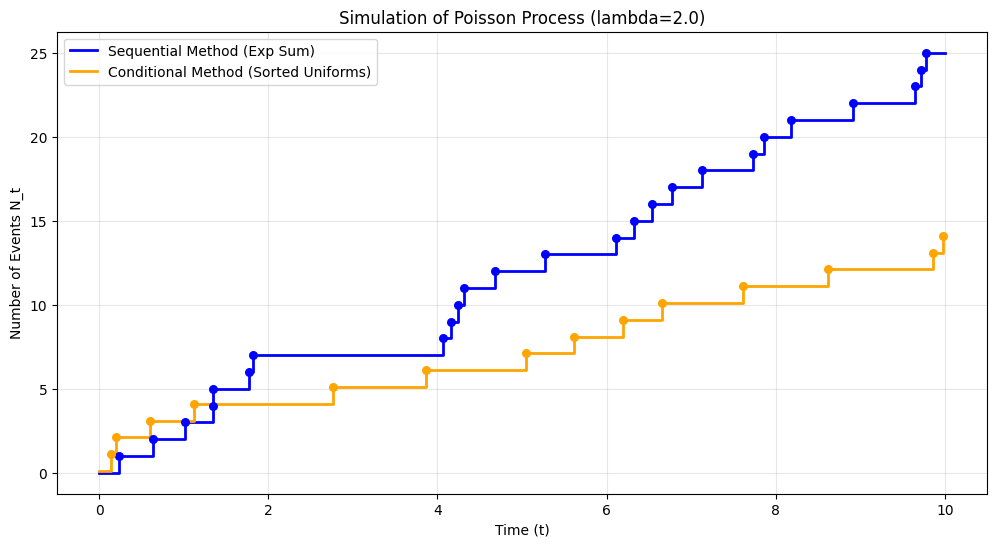

In [12]:
def simulate_poisson_process_sequential(lam, t_max):
    """
    Sequential generation using Exponential inter-arrival times.
    """
    arrivals = []
    current_time = 0

    while True:
        # 1. Generate next inter-arrival time (tau ~ Exp(lambda))
        tau = np.random.exponential(scale=1 / lam)
        current_time += tau

        # 2. Stop if we exceed the time window
        if current_time > t_max:
            break

        arrivals.append(current_time)

    return np.array(arrivals)


def simulate_poisson_process_conditional(lam, t_max):
    """
    Conditional generation using Order Statistics (Result from Q6).
    """
    # 1. Sample the total number of events N ~ Poisson(lambda * t)
    n_events = np.random.poisson(lam * t_max)

    # 2. Sample N uniform random variables on [0, t]
    uniforms = np.random.uniform(0, t_max, n_events)

    # 3. Sort them to get arrival times
    arrivals = np.sort(uniforms)

    return arrivals


# parameters
LAMBDA = 2.0  # Rate of arrivals
T_MAX = 10.0  # Duration of simulation

# simulate the sequential process as a comparison, and the
# conditional one otherwise
arrivals_seq = simulate_poisson_process_sequential(LAMBDA, T_MAX)
arrivals_cond = simulate_poisson_process_conditional(LAMBDA, T_MAX)

# plot
plt.figure(figsize=(12, 6))


# Helper function to plot step process
def plot_counting_process(arrivals, ax, label, color, offset=0):
    # Add 0 at start for plotting
    times = np.concatenate(([0], arrivals, [T_MAX]))
    counts = np.arange(len(arrivals) + 1)
    # Duplicate last count to extend to T_MAX
    counts = np.concatenate((counts, [counts[-1]]))

    ax.step(times, counts + offset, where="post", label=label, color=color, linewidth=2)
    ax.scatter(
        arrivals, np.arange(1, len(arrivals) + 1) + offset, color=color, s=30, zorder=3
    )


plot_counting_process(arrivals_seq, plt.gca(), "Sequential Method (Exp Sum)", "blue")
# Offset the second line slightly so we can see it if they overlap
plot_counting_process(
    arrivals_cond,
    plt.gca(),
    "Conditional Method (Sorted Uniforms)",
    "orange",
    offset=0.1,
)

plt.title(f"Simulation of Poisson Process (lambda={LAMBDA})")
plt.xlabel("Time (t)")
plt.ylabel("Number of Events N_t")
plt.legend()
plt.grid(True, alpha=0.3)

# Print stats
print(f"Sequential: {len(arrivals_seq)} events (Expected: {LAMBDA * T_MAX})")
print(f"Conditional: {len(arrivals_cond)} events (Expected: {LAMBDA * T_MAX})")

plt.show()


- The Blue Line (Sequential): This is the "real-life" way events happen (waiting one by
one). - The Orange Line (Conditional): This uses the result from Q6. It picks the total
number of events first, then scatters them randomly. - Both methods produce
statistically identical "staircase" trajectories (Sample paths of $N_t$), with same
expected value.

### 2.2

#### Question 8

$J_i$ is a random variable representing the size of the ith jump. Meanwhile, $C_i$ is
the cumulative sum of all the jumps up to time $t$

#### Question 9

The answer here is intuitive – if we place a restriction of $J_i$ such that $J_i \sim
\text{Ber}(p)$, that means the sample space for $J_i$ must be in {0, 1}. Therefore, each
jump must be either 1 or 0. This is the definition of a Poisson Process.

Since the question asks for an iff, we need to demonstrate this proof both directions.

**1. Sufficient Condition ($\Leftarrow$):** Suppose $J_i \sim \text{Ber}(p)$. Then $J_i$
takes values in $\{0, 1\}$. The process $C_t$ counts the number of "successes" (where
$J_i=1$) among the arrivals of the Poisson process $N_t$.

Consider a simpler poisson process, where we only select $J_i$ where $J_i = 1$, and
discard points where $J_i = 0$. The resulting process of selected points would be a
simpler Poisson process, with parameter $\lambda p$. Therefore $C_t$ is a simple Poisson
process with rate $\lambda p$.

**2. Necessary Condition ($\Rightarrow$):** Assume $C_t$ is a simple Poisson process. By
definition, the trajectories of a simple Poisson process are step functions with jumps
of magnitude exactly 1.

Since $C_t$ only changes value at the arrival times of $N_t$ (where it increases by
$J_i$), the jump sizes $J_i$ must satisfy: $$ J_i \in \{0, 1\} $$ A random variable
supported on $\{0, 1\}$ follows a Bernoulli distribution. Thus, $J_i \sim
\text{Bernoulli}(p)$ for some $p = \mathbb{P}(J_i=1)$.

Therefore, $C_t$ is a simple Poisson process if and only if the claim sizes $J_i$ follow
a Bernoulli distribution.

#### Question 10

Let $C_t = \sum_{i=1}^{N_t} J_i$.

Since the inner term is a random variale, we must condition on the value of $N_t$.

**1. Expectation:** By the Law of Iterated Expectations: $$ \mathbb{E}[C_t] =
\mathbb{E}[ \mathbb{E}[ C_t \mid N_t ] ] $$

Conditioned on $N_t = n$, $C_t$ is the sum of $n$ i.i.d. variables with mean $\mu$:

$$ \mathbb{E}[C_t \mid N_t = n] = \sum_{i=1}^n \mathbb{E}[J_i] = n\mu $$ 

Thus, $\mathbb{E}[C_t \mid N_t] = N_t \mu$.

Substituting this back: 

$$ \mathbb{E}[C_t] = \mathbb{E}[N_t \mu] = \mu \mathbb{E}[N_t] $$

Since $N_t \sim \text{Poisson}(\lambda t)$, we have $\mathbb{E}[N_t] = \lambda t$.

$$ \mathbb{E}[C_t] = \lambda t \mu $$

**2. Variance:** By the Law of Total Variance: $$ \text{Var}(C_t) = \mathbb{E}[
\text{Var}(C_t \mid N_t) ] + \text{Var}( \mathbb{E}[ C_t \mid N_t ] ) $$

*First Term (Mean of the Variance):* Conditioned on $N_t = n$, the variance of the sum
of independent variables is the sum of their variances: $$ \text{Var}(C_t \mid N_t = n)
= \sum_{i=1}^n \text{Var}(J_i) = n\sigma^2 $$ Thus, $\text{Var}(C_t \mid N_t) = N_t
\sigma^2$. $$ \mathbb{E}[ \text{Var}(C_t \mid N_t) ] = \mathbb{E}[ N_t \sigma^2 ] =
\sigma^2 \lambda t $$

*Second Term (Variance of the Mean):* From the expectation calculation, we know
$\mathbb{E}[C_t \mid N_t] = N_t \mu$. $$ \text{Var}( \mathbb{E}[ C_t \mid N_t ] ) =
\text{Var}( N_t \mu ) = \mu^2 \text{Var}(N_t) $$ Since $N_t \sim \text{Poisson}(\lambda
t)$, $\text{Var}(N_t) = \lambda t$. $$ \text{Var}( \mathbb{E}[ C_t \mid N_t ] ) = \mu^2
\lambda t $$

Therefore: $$ \text{Var}(C_t) = \sigma^2 \lambda t + \mu^2 \lambda t = \lambda t
(\sigma^2 + \mu^2) = \lambda t \mathbb{E}[J_1^2] $$

#### Question 11

In [13]:
np.random.seed(242)


def simulate_compound_poisson(lam, t_max, jump_mu, jump_sigma_sq):
    """
    Simulates a Compound Poisson Process C_t = sum(J_i).
    """
    # Simulate the underlying Poisson Process (Arrival Times)
    # Using the Conditional Method (Fastest)
    n_events = np.random.poisson(lam * t_max)
    arrival_times = np.sort(np.random.uniform(0, t_max, n_events))

    # Simulate the Jump Sizes (J_i)
    jump_sigma = np.sqrt(jump_sigma_sq)
    jumps = np.random.normal(jump_mu, jump_sigma, n_events)

    # Compute the Process Value C_t
    # The value is the cumulative sum of jumps
    # We add a 0 at the start to represent C_0 = 0
    c_values = np.cumsum(jumps)
    c_values = np.concatenate(([0], c_values))

    # Add 0 and T_MAX to times for plotting full range
    plot_times = np.concatenate(([0], arrival_times, [t_max]))
    # Duplicate last value to extend step function to T_MAX
    plot_values = np.concatenate((c_values, [c_values[-1]]))

    return plot_times, plot_values


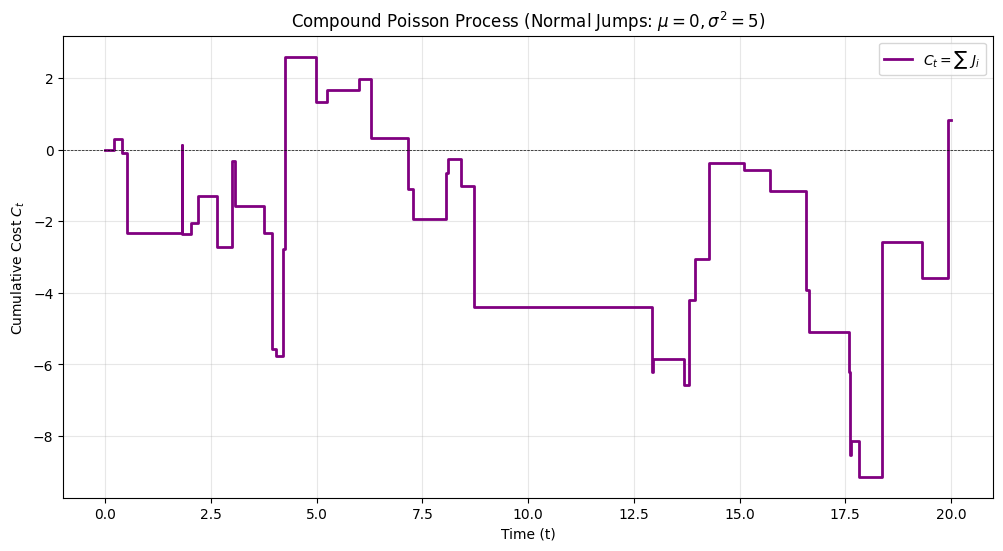

Final Value C_{20.0}: 0.83


In [37]:
# Params
LAMBDA = 2.0
T_MAX = 20.0
MU = 0
VAR = 5

# Simulate
times, values = simulate_compound_poisson(LAMBDA, T_MAX, MU, VAR)

# Plot
plt.figure(figsize=(12, 6))
plt.step(
    times,
    values,
    where="post",
    color="purple",
    linewidth=2,
    label=r"$C_t = \sum ~ J_i$",
)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")

plt.title(rf"Compound Poisson Process (Normal Jumps: $\mu={MU}, \sigma^2={VAR}$)")
plt.xlabel("Time (t)")
plt.ylabel("Cumulative Cost $C_t$")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final Value C_{{{T_MAX}}}: {values[-1]:.2f}")


### 2.3

#### Question 12

Let $A_t$ denote the event that ruin occurs within the time interval $[0, t]$:

$$ A_t = \{ \exists s \in [0, t] : R_s < 0 \} $$

By definition, $\varphi(u, t) = \mathbb{P}(A_t)$.

Let $A$ denote the event that ruin occurs at some finite time $s > 0$:

$$ A = \{ \exists s > 0 : R_s < 0 \} $$ 

By definition, $\varphi(u) = \mathbb{P}(A)$

**1. Increasing Sequence of Events:** Observe that for any $t_1 < t_2$, if ruin occurs
in $[0, t_1]$, it necessarily occurs in $[0, t_2]$. Thus:

$$ A_{t_1} \subseteq A_{t_2} $$ 

The family of events $\{A_t\}_{t>0}$ is monotonically increasing in $t$.

**2. Limit of the Sets:** The event of ultimate ruin $A$ is the union of all finite-time
ruin events: $$ \bigcup_{t>0} A_t = \{ \exists t > 0, \exists s \in [0, t] : R_s < 0 \}
= \{ \exists s > 0 : R_s < 0 \} = A $$

**3. Continuity of Probability Measure:** By the property of continuity of probability
measures for increasing sequences of events: $$ \mathbb{P}\left( \bigcup_{t>0} A_t
\right) = \lim_{t \to +\infty} \mathbb{P}(A_t) $$

Substituting the definitions of $\varphi(u)$ and $\varphi(u, t)$: $$ \mathbb{P}(A) =
\lim_{t \to +\infty} \varphi(u, t) $$

$$ \varphi(u) = \lim_{t \to +\infty} \varphi(u, t) $$

#### Question 13

Examine the behavior of the reserve $R_t = u + ct - C_t$ as $t \to \infty$.

To apply the Law of Large Numbers, consider the average behavior per unit of time by
dividing by $t$:

$$ \frac{R_t}{t} = \frac{u}{t} + c - \frac{C_t}{t} $$

Analyze the term $\frac{C_t}{t}$ (the average cost per unit time). We can decompose it
as:

$$ \frac{C_t}{t} = \frac{\sum_{i=1}^{N_t} J_i}{t} = \left( \frac{1}{N_t}
\sum_{i=1}^{N_t} J_i \right) \cdot \frac{N_t}{t} $$

**1. Applying SLLN:**

- By the Strong Law of Large Numbers applied to the i.i.d. sequence $(J_i)$, the sample
mean converges to the expectation: $$ \lim_{N_t \to \infty} \frac{1}{N_t}
\sum_{i=1}^{N_t} J_i = \mathbb{E}[J_1] = \mu \quad \text{a.s.} $$ 

> *Note: SLLN Applied to Poisson*
> 
> Since $\lambda > 0, N_t \to \infty$ as t \to \infty$ - By the SLLN applied to the
> Poisson process, the average arrival rate converges to the parameter $\lambda$: 
> $$\lim_{t \to \infty} \frac{N_t}{t} = \lambda \quad \text{a.s.}$$

The intuition here is that while in the short-term the timing and size of insurance 
claims can fluctuate wildly creating risk, the SLLM tells us that in the long-run these
fluctuations will smooth out. The total money flowing out from paying claims WILL settle
exactly on the average rate of claims ($\lambda$) times the average size of a claim 
$\mu$. Therefore, as long as the money flowing IN (premium rate $c$) is strictly greater 
than the average outflow, the company is mathematically guaranteed to accumulate infinite
wealth over time despite the short-term volatility. 

**2. Limit of the Reserve:**

Combining these limits: $$ \lim_{t \to \infty} \frac{C_t}{t} = \mu \cdot \lambda =
\lambda \mu \quad \text{a.s.} $$

Substituting back into the expression for $R_t$:

$$ \lim_{t \to \infty} \frac{R_t}{t} = 0 + c - \lambda \mu = c - \lambda \mu \quad
\text{a.s.} $$

We are given the safety loading condition $c - \lambda \mu > 0$. Let $\epsilon = c -
\lambda \mu$.

Since $\frac{R_t}{t} \to \epsilon > 0$, it implies that for sufficiently large $t$, $R_t
\approx \epsilon t$.

$$ \lim_{t \to \infty} R_t = +\infty \quad \text{a.s.} $$

The term $c$ represents the constant inflow of premiums per unit time, while $\lambda
\mu$ represents the average outflow of claim payments per unit time. The condition $c >
\lambda \mu$ implies that the insurance company is, on average, profitable. Over a long
enough horizon, the accumulated profits will exceed any accumulation of claims, causing
the reserve to grow indefinitely.

#### Question 14

Per
[Prof Mastrolia's clarification in Ed](https://edstem.org/us/courses/83631/discussion/7380426)
, I added simulations for both cases: positive and negative drift

In [19]:
def run_simulation_batch(u, c, lam, mu, sigma, t_max, num_sims, title):
    """
    Runs a batch of simulations and plots them.
    Returns the count of trajectories that went ruined.
    """
    plt.figure(figsize=(12, 6))

    ruin_count = 0

    for _ in range(num_sims):
        # Generate Poisson Arrivals
        # Expected events = lambda * t_max
        n_expected = int(lam * t_max * 1.2) + 50
        taus = np.random.exponential(1 / lam, n_expected)
        arrival_times = np.cumsum(taus)
        arrival_times = arrival_times[arrival_times <= t_max]
        n_events = len(arrival_times)

        # Generate Normal Claims
        jumps = np.random.normal(mu, sigma, n_events)

        # Construct Path
        times = [0.0]
        reserves = [u]
        has_ruin = False

        for i in range(n_events):
            t = arrival_times[i]
            jump = jumps[i]

            # Grow linearly before the jump
            prev_r = reserves[-1]
            r_before = prev_r + c * (t - times[-1])

            # Apply jump
            r_after = r_before - jump

            times.extend([t, t])
            reserves.extend([r_before, r_after])

            if r_after < 0:
                has_ruin = True
                break

        # If survived, add final segment
        if not has_ruin and times[-1] < t_max:
            times.append(t_max)
            reserves.append(reserves[-1] + c * (t_max - times[-1]))

        # Plotting
        color = "red" if has_ruin else "green"
        alpha = 0.3 if has_ruin else 0.1

        # Only label once to avoid legend clutter
        label = "Trajectory" if _ == 0 else ""
        plt.plot(times, reserves, color=color, alpha=alpha, linewidth=1, label=label)

        if has_ruin:
            ruin_count += 1

    # Add the drift line for reference
    drift = c - lam * mu
    expected_line = u + drift * np.linspace(0, t_max, 100)
    plt.plot(
        np.linspace(0, t_max, 100),
        expected_line,
        "k--",
        linewidth=2,
        label=f"Expected Drift ({drift})",
    )

    plt.axhline(0, color="black", linewidth=1)
    plt.title(f"{title}\nRuin Frequency: {ruin_count}/{num_sims}")
    plt.xlabel("Time")
    plt.ylabel("Reserve Level")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return ruin_count

Running Profitable Case


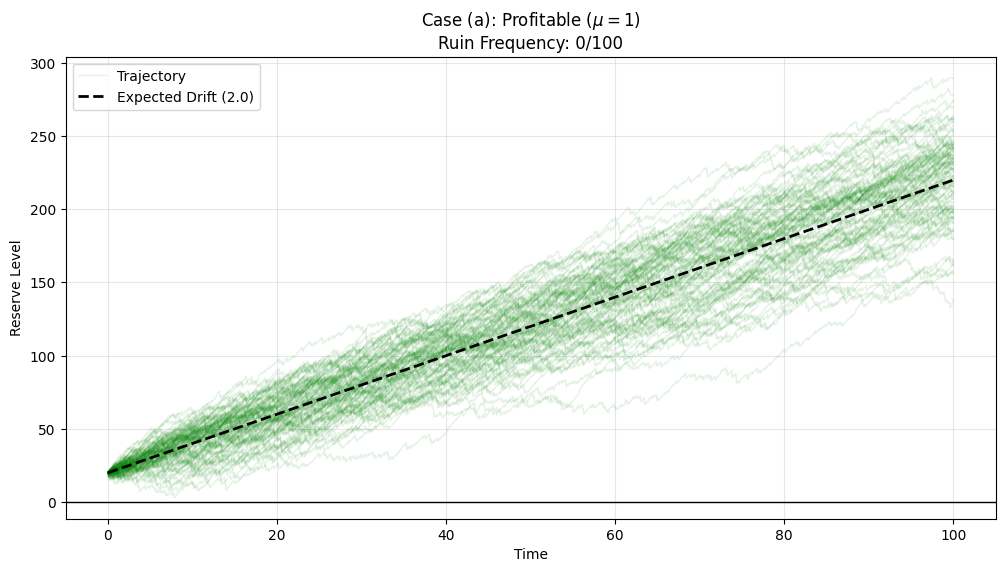

Running Ruinous Case


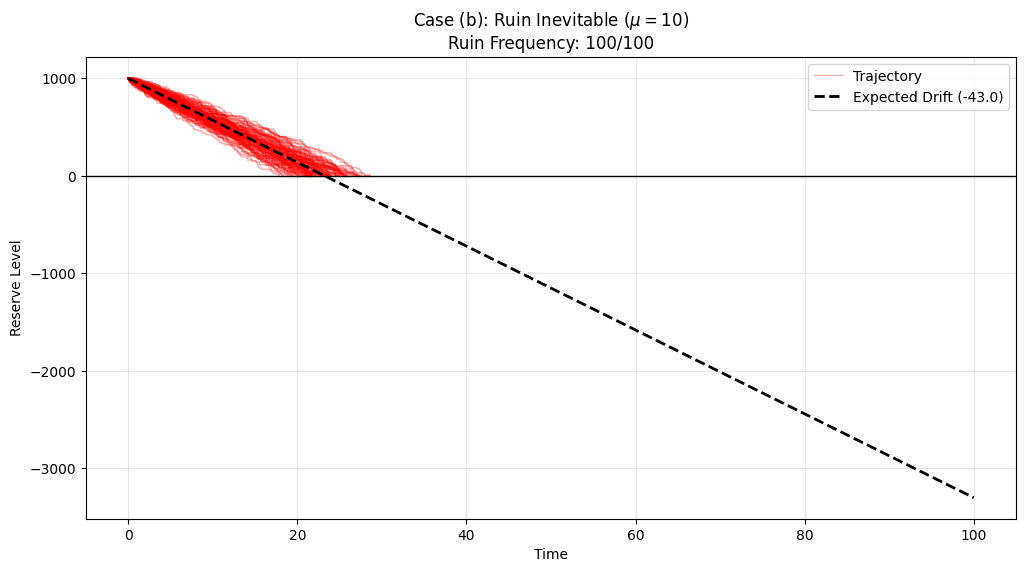

In [ ]:
np.random.seed(242)

# Params
U_START = 20
LAM = 5.0
SIGMA = 1.0
T_MAX = 100.0
SIM_COUNT = 100
C = 7.0

# Case (a): Profitable
# mu = 1 -> Outflow = 5*1 = 5. Inflow = 7. Net = +2.
print("Running Profitable Case")
ruins_a = run_simulation_batch(
    u=U_START,
    c=C,
    lam=LAM,
    mu=1.0,
    sigma=SIGMA,
    t_max=T_MAX,
    num_sims=SIM_COUNT,
    title=r"Case (a): Profitable ($\mu=1$)",
)

# --- Case (b): Ruinous ---
# mu = 10 -> Outflow = 5*10 = 50. Inflow = 7. Net = -43.
print("Running Ruinous Case")
ruins_b = run_simulation_batch(
    u=1000,  # make this incredibly high, to show that you'd still fail
    c=C,
    lam=LAM,
    mu=10.0,
    sigma=SIGMA,
    t_max=T_MAX,
    num_sims=SIM_COUNT,
    title=r"Case (b): Ruin Inevitable ($\mu=10$)",
)


## Question 3: Volatility Calibration

#### Question 1

**1. Expectation of the Estimator:**

You can apply the linearity of expectation. Since $X_k \sim \mathcal{N}(0, \sigma^2)$,
we know that $\mathbb{E}[X_k^2] = \text{Var}(X_k) + (\mathbb{E}[X_k])^2 = \sigma^2$.

\begin{align*} \mathbb{E}[\hat{\sigma}_N^2] &= \mathbb{E}\left[ \frac{1}{N}
\sum_{k=1}^{N} (S_{t_k} - S_{t_{k-1}})^2 \right] \\ &= \frac{1}{N} \sum_{k=1}^{N}
\mathbb{E}[X_k^2] \\ &= \frac{1}{N} \sum_{k=1}^{N} \sigma^2 \\ &= \frac{1}{N} \cdot (N
\sigma^2) \\ &= \sigma^2 \end{align*}

Thus, the estimator is unbiased.

**2. Variance of the Estimator:**

Since the increments $X_k$ are independent, the squared increments $X_k^2$ are also
independent. For a normal variable $X_k \sim \mathcal{N}(0, \sigma^2)$, the fourth
moment is $\mathbb{E}[X_k^4] = 3\sigma^4$. Therefore, $\text{Var}(X_k^2) =
\mathbb{E}[X_k^4] - (\mathbb{E}[X_k^2])^2 = 3\sigma^4 - (\sigma^2)^2 = 2\sigma^4$.

\begin{align*} \text{Var}(\hat{\sigma}_N^2) &= \text{Var}\left( \frac{1}{N}
\sum_{k=1}^{N} X_k^2 \right) \\ &= \frac{1}{N^2} \sum_{k=1}^{N} \text{Var}(X_k^2) \\ &=
\frac{1}{N^2} \sum_{k=1}^{N} 2\sigma^4 \\ &= \frac{1}{N^2} \cdot (N \cdot 2\sigma^4) \\
&= \frac{2\sigma^4}{N} \end{align*}

As $N \to \infty$, the variance tends to 0, implying the estimator is consistent.

#### Question 2

In [30]:
def calibrate_volatility(file_path):
    # NOTE: We only need Date and Adj Close
    try:
        df = pd.read_csv(file_path, usecols=["Date", "Adj Close"])
    except ValueError:
        # Fallback
        df = pd.read_csv(file_path, header=0)
        df = df.iloc[:, [0, 5]]  # Select 1st and 6th columns
        df.columns = ["Date", "Adj Close"]

    # Convert Date to datetime
    df["Date"] = pd.to_datetime(df["Date"])

    # Convert Adj Close to numeric
    df["Adj Close"] = pd.to_numeric(df["Adj Close"], errors="coerce")

    # Drop rows where Adj Close is NaN (bad data)
    if df["Adj Close"].isna().any():
        dropped_count = df["Adj Close"].isna().sum()
        print(f"Warning: Dropped {dropped_count} non-numeric rows.")
        df = df.dropna(subset=["Adj Close"])

    # Sort ascending (Oldest to Newest) is CRITICAL for differencing
    df = df.sort_values("Date", ascending=True)

    # Extract price series S_t
    S = df["Adj Close"].values

    # Compute increments: S_t - S_{t-1}
    increments = np.diff(S)

    # Apply the estimator formula from Question 1
    # sigma^2_hat = (1/N) * sum( (S_tk - S_tk-1)^2 )
    N_increments = len(increments)
    squared_increments = increments**2
    sum_sq_diff = np.sum(squared_increments)

    sigma_squared_hat = (1 / N_increments) * sum_sq_diff
    sigma_hat = np.sqrt(sigma_squared_hat)

    # Results
    print("Volatility Calibration (Part 3, Q2)")
    print(f"Data Window: {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"Number of trading days (N): {N_increments}")
    print(f"Sum of Squared Differences: {sum_sq_diff:.4f}")
    print(f"Estimated Variance (sigma^2): {sigma_squared_hat:.4f}")
    print(f"Estimated Volatility (sigma): {sigma_hat:.4f}")

    return sigma_hat, df

Volatility Calibration (Part 3, Q2)
Data Window: 2025-09-22 to 2025-11-26
Number of trading days (N): 38
Sum of Squared Differences: 460.9786
Estimated Variance (sigma^2): 12.1310
Estimated Volatility (sigma): 3.4830


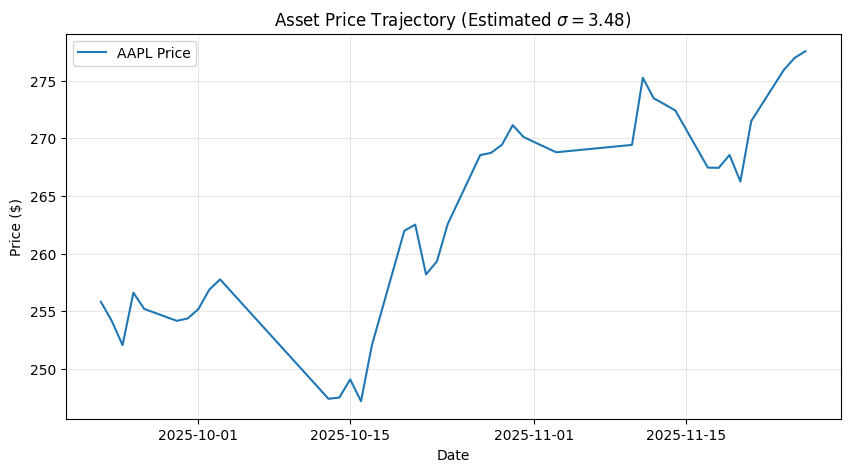

In [33]:
sigma_est, df_used = calibrate_volatility("data/aapl.csv")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_used["Date"], df_used["Adj Close"], label="AAPL Price")
plt.title(rf"Asset Price Trajectory (Estimated $ \sigma = {sigma_est:.2f}$)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## Question 4: Simulation with Rejection

#### Question 1 and Question 2

This is the function we want to simulate in general:

In [ ]:
def target_f(x):
    """The PDF we want to simulate: 30(x^2 - 2x^3 + x^4)"""
    return 30 * (x**2 - 2 * x**3 + x**4)

Question 1
Simulations:      10000
Empirical Mean:   0.49811
Theoretical Mean: 0.50000

Question 2
Total Attempts:   18717
Acceptance Rate:  0.53427
Theoretical (1/c):0.53333 (8/15)


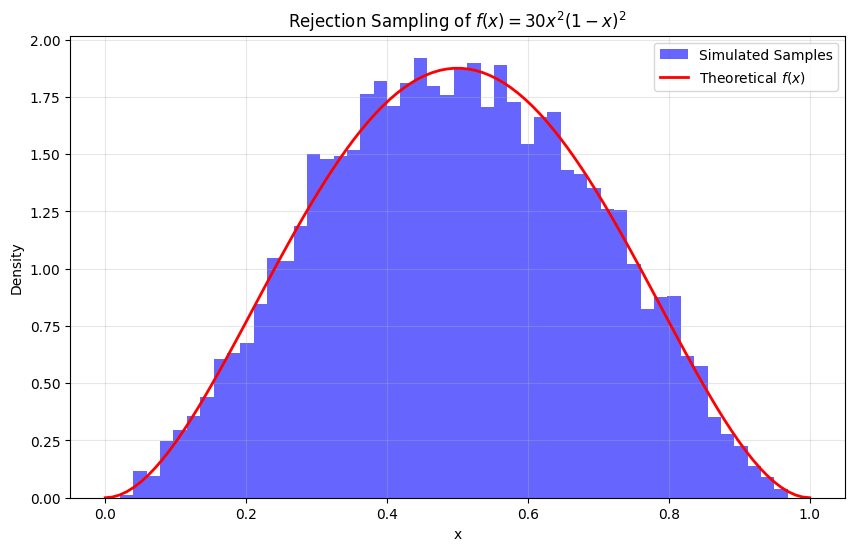

In [24]:
def rejection_sampling_beta(n_samples):
    """
    Generates samples from f(x) using Rejection Method with Uniform proposal.
    Returns: samples, total_attempts
    """
    samples = []
    total_attempts = 0
    c = 15 / 8

    while len(samples) < n_samples:
        total_attempts += 1

        # Generate Y from g(x) (Uniform [0,1])
        y = np.random.rand()

        # Generate U from Uniform [0,1]
        u = np.random.rand()

        # Acceptance Condition: U <= f(Y) / (c * g(Y))
        # Since g(Y) = 1, condition is U <= f(Y) / c
        if u <= target_f(y) / c:
            samples.append(y)

    return np.array(samples), total_attempts


# Parameters
M = 10000

# Simulate
np.random.seed(242)
x_samples, total_tries = rejection_sampling_beta(M)

# Q1 Analysis
empirical_mean = np.mean(x_samples)
# Theoretical Mean of Beta(3,3) = alpha / (alpha + beta) = 3 / 6 = 0.5
# Or integral of x * 30 * x^2(1-x)^2 dx
theoretical_mean = 0.5

print("Question 1")
print(f"Simulations:      {M}")
print(f"Empirical Mean:   {empirical_mean:.5f}")
print(f"Theoretical Mean: {theoretical_mean:.5f}")

# Q2 Analysis
# Acceptance Rate = Accepted / Total
acceptance_rate = M / total_tries
theoretical_rate = 1 / (15 / 8)

print("\nQuestion 2")
print(f"Total Attempts:   {total_tries}")
print(f"Acceptance Rate:  {acceptance_rate:.5f}")
print(f"Theoretical (1/c):{theoretical_rate:.5f} (8/15)")

# Plot
plt.figure(figsize=(10, 6))
plt.hist(
    x_samples, bins=50, density=True, alpha=0.6, color="blue", label="Simulated Samples"
)

# Plot theoretical curve
x_vals = np.linspace(0, 1, 100)
plt.plot(x_vals, target_f(x_vals), "r-", linewidth=2, label=r"Theoretical $f(x)$")

plt.title("Rejection Sampling of $f(x) = 30x^2(1-x)^2$")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


The acceptance rate is approximately 53.3%. This is because the rejection method accepts
a point with probability 1/c, and $c=\frac{1}{1.875}=0.5333$. This confirms that our
algorithm is wasting about 47% of the generated data points, which is the "cost" of
using the rejection method to convert Uniform variables into Beta variables

#### Question 3 and Question 4

Question 3 (Half-Normal Z=|N|)
Empirical Mean:     0.78487 (Theoretical: sqrt(2/pi) ≈ 0.7979)
Empirical Variance: 0.36202 (Theoretical: 1 - 2/pi ≈ 0.3634)
------------------------------

Question 4 (Standard Normal N)
Empirical Mean:     0.00272 (Theoretical: 0.0)
Empirical Variance: 0.97803 (Theoretical: 1.0)


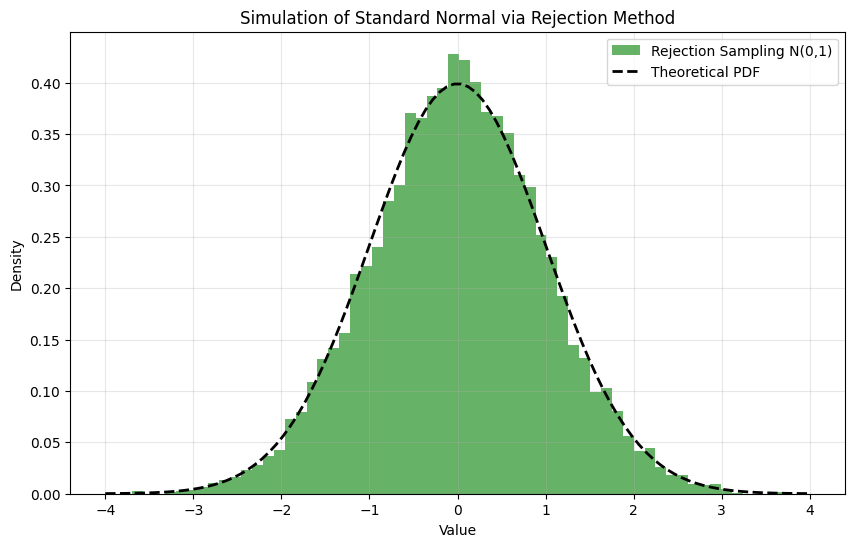

In [25]:
def simulate_normal_rejection(M):
    """
    Simulates Standard Normal N(0,1) via Rejection Sampling of |N|.
    Proposal Y ~ Exp(1).
    """
    z_samples = []

    # We need M samples.
    # Efficiency is approx 1/c = sqrt(pi/2e) approx 0.76.
    # So we generate a batch slightly larger than M/0.76 to avoid slow loops
    batch_size = int(M * 1.5)

    while len(z_samples) < M:
        # Generate Proposal Y ~ Exp(1)
        y = np.random.exponential(scale=1.0, size=batch_size)

        # Generate U ~ Uniform[0,1]
        u = np.random.rand(batch_size)

        # Acceptance Condition: U <= exp(-(y-1)^2 / 2)
        # Derived from f(y)/(c*g(y))
        condition = u <= np.exp(-((y - 1) ** 2) / 2)

        accepted = y[condition]
        z_samples.extend(accepted)

    # Trim to exactly M samples
    z_samples = np.array(z_samples[:M])

    # Statistics for Z
    z_mean = np.mean(z_samples)
    z_var = np.var(z_samples)

    print("Question 3 (Half-Normal Z=|N|)")
    print(f"Empirical Mean:     {z_mean:.5f} (Theoretical: sqrt(2/pi) ≈ 0.7979)")
    print(f"Empirical Variance: {z_var:.5f} (Theoretical: 1 - 2/pi ≈ 0.3634)")
    print("-" * 30)

    # Question 4: Simulate N (Standard Normal)
    # Generate random signs: V <= 0.5 -> positive, V > 0.5 -> negative
    v = np.random.rand(M)
    signs = np.where(v <= 0.5, 1, -1)

    n_samples = z_samples * signs

    # Statistics for N
    n_mean = np.mean(n_samples)
    n_var = np.var(n_samples)

    print("\nQuestion 4 (Standard Normal N)")
    print(f"Empirical Mean:     {n_mean:.5f} (Theoretical: 0.0)")
    print(f"Empirical Variance: {n_var:.5f} (Theoretical: 1.0)")

    return n_samples


# Params
M_SIMS = 10000

# Simulate
np.random.seed(242)
normal_samples = simulate_normal_rejection(M_SIMS)

# Plot (only for Q4)
plt.figure(figsize=(10, 6))

# Histogram of simulated N
plt.hist(
    normal_samples,
    bins=60,
    density=True,
    alpha=0.6,
    color="green",
    label="Rejection Sampling N(0,1)",
)

# Theoretical PDF for N(0,1)
x = np.linspace(-4, 4, 100)
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
plt.plot(x, pdf, "k--", linewidth=2, label="Theoretical PDF")

plt.title("Simulation of Standard Normal via Rejection Method")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
